In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
nome="freq_jitter01"
f=open("dati/"+nome)

f0=[]
Q=[]
n_means=[]

for x in f:
    y=x.split()
    f0.append(float(y[0]))
    Q.append(float(y[1]))
    n_means.append(float(y[2]))
f0=np.array(f0)

nome1="freq_and_amp_jitter01"
f=open("dati/"+nome1)

f01=[]
Q1=[]
n_means1=[]

for x in f:
    y=x.split()
    f01.append(float(y[0]))
    Q1.append(float(y[1]))
    n_means1.append(float(y[2]))
f01=np.array(f01)


In [21]:
def lorentian(x, n_max, Gamma, x_resonance=0):
    return n_max*(Gamma**2/((x-x_resonance)**2+Gamma**2))


In [22]:
n_max=7
g = 2.2*780/1013-0.6

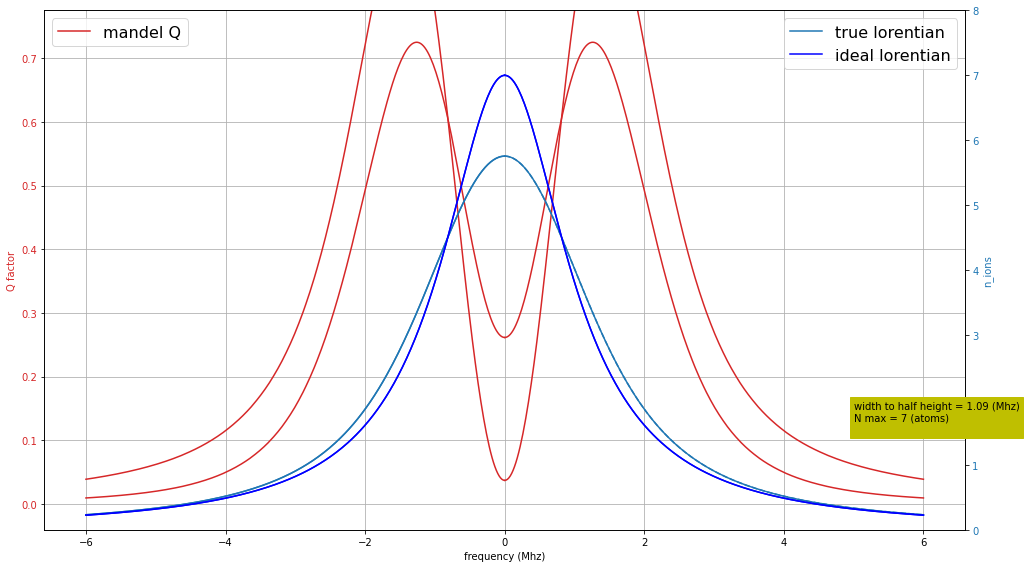

In [27]:
y=lorentian(f0,n_max,g)
y1=lorentian(f01,n_max,g)

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:red'
ax1.set_xlabel('frequency (Mhz)')
ax1.set_ylabel('Q factor', color=color)
ax1.plot(f0, Q, "-", color=color, label="mandel Q")
ax1.plot(-f0, Q, "-", color=color)
ax1.plot(f01, Q1, "-", color=color)
ax1.plot(-f01, Q1, "-", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([min(Q)-0.05,max(Q)+0.05])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('n_ions', color=color)  # we already handled the x-label with ax1
ax2.plot(f0, n_means, "-", color=color, label="true lorentian")
ax2.plot(-f0, n_means, "-", color=color)
ax2.plot(f01, n_means1, "-", color=color)
ax2.plot(-f01, n_means1, "-", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,n_max+1])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()

plt.plot(f0, y, c="b", label="ideal lorentian")
plt.plot(-f0, y, c="b")
plt.plot(f01, y1, c="b")
plt.plot(-f01, y1, c="b")
ax1.legend(loc=2, fontsize=16)
ax2.legend(loc=1, fontsize=16)

text=""
text=text+"width to half height = %.2f (Mhz)\n" %g
text=text+"N max = %d (atoms)\n" %n_max
# text=text+"frequency jitter std = %.2f (Mhz)\n" %f_std

ax2.text(x=5,y=1.5,s=text,backgroundcolor="y")

plt.show()